In [ ]:
# ALL imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

---
#### CS 280 Final Project - FA23
---

# How much of an effect does an umpire making an incorrect call have on a Major League Baseball game?

### By: Matt Marriott, Evan Herrera, Jonathan Eudja


---

## 1. Introduction

For this project, our group explored how an MLB umpire can have an effect on an MLB game by getting calls right, wrong, or being inconsitent with their strike zone. With the current technology that we have in our world, there are always new ways to evolve. With the sports entertainment industry, one of the main problems is the effect that umpires and referees have on a live game. The difference that one incorrect call can have on the outcome of a play, game, season, or even a player’s career can be immense, changing the way that some people feel about a product. We decided to use our project to take a look at something that we feel could be changed soon, with talks of implementing robot umpires into Major League Baseball. Our main question for the project is the following. Are the modern day MLB umpires good and how much of an impact do they have on the results on a game based on human error. Some of the tests we ran through the project included splitting the umpires into groups based on certain values that they held and comparing to see if their accuracies had an effect on the outcome. One of our first questions was what does a relationship between expected incorrect calls and incorrect calls look like and we learned it was relatively positive. This led us to examine a linear regression model between call accuracy and incorrect calls which led us to an accurate linear regression model. This lead us to our next question which asked how accurate are umpires with their calls? We learned umpires 95% of umpires have an accurace between 89 - 94.5%. This then lead us to ask ourselfs to see if umpires have a better accuracy at the end of the season compared to the beggining so we examined umpires first 10 games accuracies and their last 10 games of the seasons accuracies to see if they improved as the season went on. We learned that umpires are more accurate during the end of the season compared to the beggining. The next part that we looked into was taking a look into umpires who favor home teams and umpires who favor away teams. We wanted to see if there was a connection between umpires accuracy and their favor home values. First we wanted to see a permutation test based on umpires who favored home and umpires who favored away teams and how their accuracies compared to one another. After running a permutaiton test we noticed there accuracies were very similar with a p-value of 87 percent which suggests that there is no difference between those two values. Next we wanted to set a difference threshold on the favor_home value and look into umpires whose absolute value of favor home > .1 compared to those who are < .1 to see if there is any difference in accuracies between those umpires. We did a perumutation test between this group of umpires and found that there was a less of a connection between the two. We found that the test statistic of mean accuracy was different by .3% which after doing a permutation test we found a p-value of 30%. This p-value suggested that that there isn't strong evidence against the null hypothesis based on the observed data. So after this we wanted to do one last visualization which we wanted to see if there was a difference in average incorrect calls per game using the same threshold splitting umpires into groups based on their absolute value of favor home being > .1 and <.1. When we distributed the data we also used a confidence interval to see where 95% of the data would be based on the bootstrapping samples. After examing the data we learned that there should be some suspicion between umpires whose threshold of absolute valoe favor home > .1 but also that there wasn't enough evidence to support the claim.

---

## 2. Data

A direct link to the data can be found at the following website.
 * https://www.kaggle.com/datasets/mattop/mlb-baseball-umpire-scorecards-2015-2022

**According to the website, the data was collected between the years of 2015 - 2022. It was collected by college students watching baseball games.**

In [ ]:
#importing the data from github
umpire = pd.read_csv("https://raw.githubusercontent.com/jjthisguy/umpire_scorecard/main/umpire_scorecard.csv")


In [ ]:
#Changing all of the columns that were strings to floats
umpire[['expected_incorrect_calls','correct_calls','expected_correct_calls','correct_calls_above_expected',
                 'accuracy','expected_accuracy','accuracy_above_expected','consistency','favor_home','total_run_impact',
                'pitches_called','incorrect_calls']] = umpire[['expected_incorrect_calls','correct_calls','expected_correct_calls',
                                                               'correct_calls_above_expected','accuracy','expected_accuracy','accuracy_above_expected',
                                                               'consistency','favor_home','total_run_impact',
                                                               'pitches_called','incorrect_calls']].replace('ND', np.nan).astype('float')

### 2.1 Summary of Variables within the Umpire Table

The Umpire table has 19 columns/variables and 18,213 rows.   We now explain each variable, giving their units, indicating their types, and providing some descriptive statistics..

**Categorical Variables**:
*  **id** – id number
    * Number of missing values: 0
    * Contains 18,213 distinct values
    
* **umpire** – name of umpire
    * Number of missing values: 0
    * Contains 124 distinct values
            * Jeff Nelson
            * Bill Miller
            * Mike Winters
            * Pat Hoberg   
    

* **date** – date of game
    * Number of missing values: 0
    * Contains 1520 distinct values
        * 11/5/2022
        * 4/5/2015
        * 11/1/2022
    
    
* **home** – name of home team
    * Number of missing values: 0
    * Contains 30 distinct values
      * HOU
      * PHI
      * MIA
      * OAK
    
* **away** – name of away team
    * Number of missing values: 0
    * Contains 30 distinct values
      * HOU
      * ATL
      * PHI
      * MIA
      * OAK


**Continious Variables:**

* **home_team_runs** –  total number of runs for the home team
    * Number of missing values: 0
    * Units: if necessary; delete otherwise.
    * max value: 29
    * min value: 0
    * average value: 4.5

* **away_team_runs** –  total number of runs for the away team
    * Number of missing values: 0
    * max value: 28
    * min value: 0
    * average value: 4.4
    


* **pitches_called** –  total number of pitches that were called  
    * Number of missing values:  120
    * max value: 375
    * min value: 68
    * average value: 154

* **incorrect_calls** –   total number of calls that were incorrect   
    * Number of missing values:  120
    * max value: 45
    * min value: 0
    * average value: 11
    
* **expected_incorrect_calls** –   total number of calls that were expected to be incorrect based off of the umpire's projected consistent zone   
    * Number of missing values:  120
    * max value: 43.9
    * min value: 3.1
    * average value: 11.9
    
* **correct_calls** –  total number of calls that were correct
    * Number of missing values:  120
    * max value: 331
    * min value: 63
    * average value: 142
    
* **expected_correct_calls** –  total number of calls that were expected to be correct
    * Number of missing values:  120
    * max value: 331
    * min value: 63
    * average value: 142
    
* **correct_calls_above_expected** –   total number of correct calls that were above the expected amount
    * Number of missing values:  120
    * max value: 16.1
    * min value: -24.5
    * average value: 0.2
    
* **accuracy** –   the percentage of accuracy for the umpire
    * Number of missing values:  120
    * max value: 100
    * min value: 78.4
    * average value: 92.4
    
* **expected_accuracy** –  the expected percentage of accuracy for the game
    * Number of missing values: 120
    * max value: 97.4
    * min value: 85.0
    * average value: 92.2
    
* **consistency** –   total percentage of consistent calls for the umpire
    * Number of missing values: 120
    * max value: 100.0
    * min value: 81.4
    * average value: 92.2

* **favor_home** –   value at which the home team is favored
    * Number of missing values: 120
    * max value: 3.4
    * min value: -3.4
    * average value: 0.03
    * The amount of run differential caused by the umpires for the home team

* **total_run_impact** –   the amount of runs that are impacted from incorrect calls
    * Number of missing values: 120
    * max value: 7.1
    * min value: 0
    * average value: 1.5  

### 2.2 Code used to Summarize Variables

In this section we include the code used to describe the variables in the previous section.  

In [ ]:
#Descriptive Stats for variable id
umpire['id'].describe()

count    18213.000000
mean      9107.000000
std       5257.784562
min          1.000000
25%       4554.000000
50%       9107.000000
75%      13660.000000
max      18213.000000
Name: id, dtype: float64

In [ ]:
#Descriptive Stats for variable umpire
umpire['umpire'].describe()

count           18213
unique            124
top       Bill Miller
freq              240
Name: umpire, dtype: object

In [ ]:
#Descriptive Stats for variable date
umpire['date'].describe()

count        18213
unique        1520
top       9/4/2020
freq            20
Name: date, dtype: object

In [ ]:
#Descriptive Stats for variable home
umpire['home'].describe()

count     18213
unique       30
top         LAD
freq        644
Name: home, dtype: object

In [ ]:
#Descriptive Stats for variable away
umpire['away'].describe()

count     18213
unique       30
top         HOU
freq        643
Name: away, dtype: object

In [ ]:
#Descriptive Stats for variable home_team_runs
umpire['home_team_runs'].describe()

count    18213.000000
mean         4.559216
std          3.152934
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         29.000000
Name: home_team_runs, dtype: float64

In [ ]:
#Descriptive Stats for variable away_team_runs
umpire['away_team_runs'].describe()

count    18213.000000
mean         4.433152
std          3.209500
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         28.000000
Name: away_team_runs, dtype: float64

In [ ]:
#Descriptive Stats for variable home_team_runs
umpire['pitches_called'].describe()

count    18093.000000
mean       154.562538
std         24.212565
min         68.000000
25%        138.000000
50%        153.000000
75%        169.000000
max        375.000000
Name: pitches_called, dtype: float64

In [ ]:
#Descriptive Stats for variable incorrect_calls
umpire['incorrect_calls'].describe()

count    18093.000000
mean        11.704969
std          4.629384
min          0.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         45.000000
Name: incorrect_calls, dtype: float64

In [ ]:
#Descriptive Stats for variable expected_incorrect_calls
umpire['expected_incorrect_calls'].describe()

count    18093.000000
mean        11.916371
std          3.228460
min          3.100000
25%          9.600000
50%         11.600000
75%         13.900000
max         43.900000
Name: expected_incorrect_calls, dtype: float64

In [ ]:
#Descriptive Stats for variable correct_calls
umpire['correct_calls'].describe()

count    18093.000000
mean       142.857569
std         22.842940
min         63.000000
25%        127.000000
50%        141.000000
75%        156.000000
max        331.000000
Name: correct_calls, dtype: float64

In [ ]:
#Descriptive Stats for variable expected_correct_calls
umpire['expected_correct_calls'].describe()

count    18093.000000
mean       142.646167
std         22.560097
min         63.000000
25%        127.500000
50%        141.100000
75%        155.900000
max        331.100000
Name: expected_correct_calls, dtype: float64

In [ ]:
#Descriptive Stats for variable correct_calls_above_expected
umpire['correct_calls_above_expected'].describe()

count    18093.000000
mean         0.211402
std          3.412681
min        -24.500000
25%         -1.900000
50%          0.400000
75%          2.500000
max         16.100000
Name: correct_calls_above_expected, dtype: float64

In [ ]:
#Descriptive Stats for variable accuracy
umpire['accuracy'].describe()

count    18093.000000
mean        92.420920
std          2.779731
min         78.400000
25%         90.700000
50%         92.700000
75%         94.400000
max        100.000000
Name: accuracy, dtype: float64

In [ ]:
#Descriptive Stats for variable expected_accuracy
umpire['expected_accuracy'].describe()

count    18093.000000
mean        92.284171
std          1.733561
min         85.000000
25%         91.200000
50%         92.500000
75%         93.500000
max         97.400000
Name: expected_accuracy, dtype: float64

In [ ]:
#Descriptive Stats for variable consistency
umpire['consistency'].describe()

count    18093.000000
mean        93.170536
std          2.254605
min         81.400000
25%         91.700000
50%         93.300000
75%         94.700000
max        100.000000
Name: consistency, dtype: float64

In [ ]:
#Descriptive Stats for variable favor_home
umpire['favor_home'].describe()

count    18093.000000
mean         0.034539
std          0.637280
min         -3.450000
25%         -0.330000
50%          0.030000
75%          0.400000
max          3.400000
Name: favor_home, dtype: float64

In [ ]:
#Descriptive Stats for variable total_run_impact
umpire['total_run_impact'].describe()

count    18093.000000
mean         1.532298
std          0.773497
min          0.000000
25%          0.970000
50%          1.410000
75%          1.950000
max          7.140000
Name: total_run_impact, dtype: float64

In [ ]:
#Null Values
umpire.isna().sum()

id                                0
date                              0
umpire                            0
home                              0
away                              0
home_team_runs                    0
away_team_runs                    0
pitches_called                  120
incorrect_calls                 120
expected_incorrect_calls        120
correct_calls                   120
expected_correct_calls          120
correct_calls_above_expected    120
accuracy                        120
expected_accuracy               120
accuracy_above_expected         120
consistency                     120
favor_home                      120
total_run_impact                120
dtype: int64

---
## 3. Results

First we want to split all the umpires into groups of the individual umpire since we plan on working with them as groups.

In [ ]:
#grouping umpire with all the means of the columns
grouped_by_umpire = umpire.groupby("umpire").mean(numeric_only = True).reset_index()

#dropping id column because it gives the average of all the ids so it may be confusing to read for the viewer
grouped_by_umpire = grouped_by_umpire.drop('id', axis=1)

#renaming columns
grouped_by_umpire = grouped_by_umpire.rename(columns={'home_team_runs': 'mean_home_team_runs', 'away_team_runs': 'mean_away_team_runs', "pitches_called" : "mean_pitches_called", "incorrect_calls" : "mean_incorrect_calls",
                                                      "expected_incorrect_calls" : "mean_expected_incorect_calls" , "correct_calls" : "mean_correct_calls" , "expected_correct_calls" : "mean_expected_correct_calls" ,
                                                      "correct_calls_above_expected	" : "mean_correct_calls_above_expected" , "accuracy" : "mean_accuracy" , "expected_accuracy" : "mean_expected_accuracy" ,
                                                      "accuracy_above_expected" : "mean_accuracy_above_expected" , "consistency" : "mean_consistency" ,"favor_home" : "mean_favor_home"
                                                      , "total_run_impact" : "mean_total_run_impact"  })

### 3.1.1 For our first test we would like to see what a relationship between expected incorrect calls and actual incorrect calls would look like

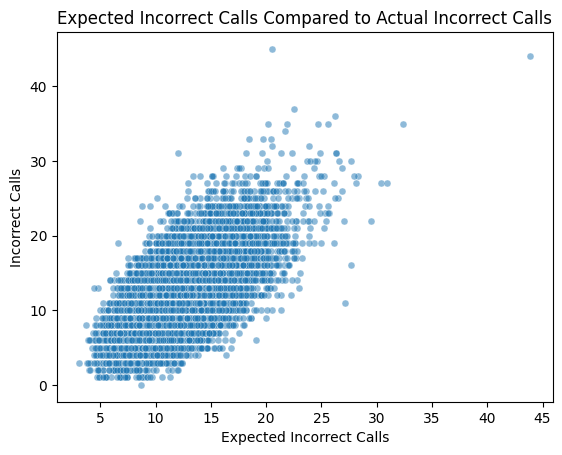

In [ ]:
#scatterplot of expected_incorrect_calls and incorrect calls
sns.scatterplot(data = umpire, x = "expected_incorrect_calls", y = "incorrect_calls", s = 25, alpha = .5)
plt.xlabel("Expected Incorrect Calls")
plt.ylabel("Incorrect Calls")
plt.title("Expected Incorrect Calls Compared to Actual Incorrect Calls");

In [ ]:
#correlation coefficient of the scatterplot
calls_corr = umpire['expected_incorrect_calls'].corr(umpire['incorrect_calls'])
calls_corr

0.6760355819725596

Looking at the scatterplot we learned that expected incorrect calls has a relatively strong positive relationship with incorrect calls with a correlation coeffient of 67%. It seems to show that more of the time there is a higher value of expected incorrect calls than the actual incorrect calls. This makes us curious about what a linear regression model would look like between umpires call accuracies. So for our next model we will make an equation based on umpire accuracy and their incorrect calls.

### 3.1.2 What would a linear regression model look like between incorrect calls and an umpires accuracy?

In [ ]:
#removing NAN's from umpire data to allow linear regression code to work
no_nan_umpires = umpire.dropna(axis = 0, how = "any")

#generation regression line
x_incorrect_calls = no_nan_umpires[["incorrect_calls"]]
y_accuracy = no_nan_umpires[["accuracy"]]

#using package to fit a model
linear_regressor_umpires = lm.LinearRegression()
linear_regressor_umpires.fit(x_incorrect_calls, y_accuracy)

LinearRegression()

In [ ]:
#working on getting the equation
slope_coeffs = linear_regressor_umpires.coef_[0][0]
intercept = linear_regressor_umpires.intercept_[0]

#checking to see that a coefficient, intercept value, and equation will fit
print("Slope Coefficients:", slope_coeffs)
print("\nIntercept Value:", intercept)
print(f"Equation: y= {slope_coeffs:.3f}x + {intercept:.3f}")

Slope Coefficients: -0.5439051192776246

Intercept Value: 98.787312129021
Equation: y= -0.544x + 98.787


Text(0, 0.5, 'Call Accuracy')

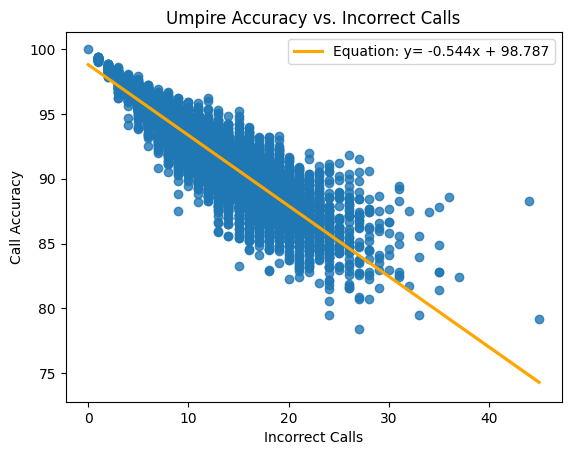

In [ ]:
#plotting regression line
reg_line_label = f"Equation: y= {slope_coeffs:.3f}x + {intercept:.3f}"

sns.regplot(data = no_nan_umpires, x = "incorrect_calls", y = "accuracy", line_kws = {"color" : "orange", "label" : reg_line_label})

plt.title("Umpire Accuracy vs. Incorrect Calls")
plt.legend()
plt.xlabel("Incorrect Calls")
plt.ylabel("Call Accuracy")

In [ ]:
#calculating correlation coeff for graph above
accuracy_corr = no_nan_umpires['incorrect_calls'].corr(no_nan_umpires['accuracy'])
accuracy_corr

-0.9058235452552298

Looking at the results we learned that there is a very strong negative relationship between call accuracy and incorrect calls. We calculated that the correlation coefficent is -90% which is why we learned there is a very strong negative relationship. We are mostly confident that with this equation we would be able to predict an umpires accuracy. This information helped us form our next question to analysis which is about looking into average accuracies of umpires.

### 3.2.1 What would the mean accuracies of umpires be if we grouped them into their own categories?

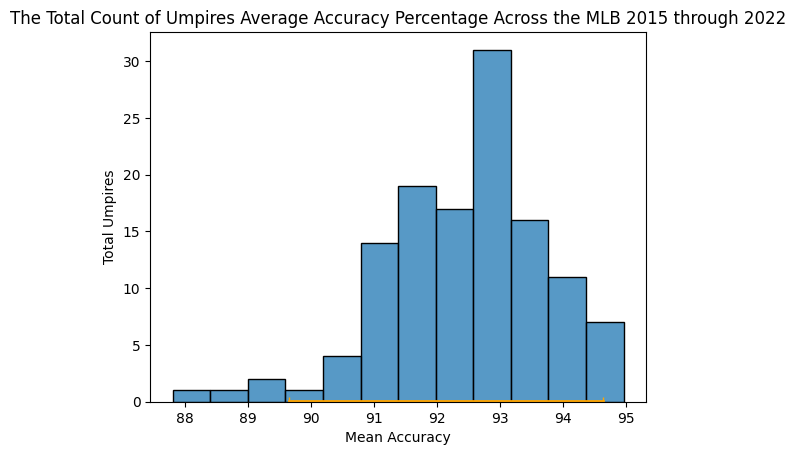

In [ ]:
#calculating left and right endpoints for CI
left_accuracy = np.percentile(grouped_by_umpire["mean_accuracy"], 2.5, method = "higher")
right_accuracy = np.percentile(grouped_by_umpire["mean_accuracy"], 97.5, method = "higher")

#plot of average accuracy across MLB Umpires through 2015-2022
sns.histplot(grouped_by_umpire, x = "mean_accuracy")
plt.xlabel("Mean Accuracy")
plt.ylabel("Total Umpires")
plt.title("The Total Count of Umpires Average Accuracy Percentage Across the MLB 2015 through 2022")

#Confidence interval plot
plt.plot([left_accuracy, right_accuracy], [.1,.1],
         color = "orange",
         linewidth = 2,
         zorder = 1,
         marker = "|");

Looking at the graph we learned that 95 percent of the time an umpires accuracy is between 89.5 - 94.5 percent. We also noticed that a big proportion of umpires have an accuracy of 93 percent seeing that that bar is almost two times as big as the second biggest. This made us curious to research about umpires accuracy and see if umpires have a better accuracy at the end of the season compared to their accuracy at the beggining of the season.

### 3.2.2 What would be the difference in accuracy from an umpires first 10 games compared to their last 10 games?

In [ ]:
#creaing a year dataframe to know which season a game took place in
umpire['date'] = pd.to_datetime(umpire['date'])
umpire['Year'] = umpire['date'].dt.year

In [ ]:
#testing accuracy of jordan baker by grouping stats based on his name
sorted_umpire = umpire.sort_values('date', ascending = True)
grouped_object = sorted_umpire.groupby(['umpire','Year'])
example_group = grouped_object.get_group(('Jordan Baker',2022))

In [ ]:
#function to output difference between last 10 games accuracy and first 10 games accuracy
def compare_first_to_last_games(df_group,num_games = 10, column = 'accuracy'):
  first_games = df_group.head(num_games)
  last_games = df_group.tail(num_games)
  first_10_games_accuracy = first_games[column].mean()
  last_10_games_accuracy = last_games[column].mean()
  mean_accuracy_difference = last_10_games_accuracy - first_10_games_accuracy

  #code to plot stats of games
  plt.figure(figsize=(10, 6))
  plt.hist([first_games[column], last_games[column]], bins=num_games, color=['blue', 'orange'], label=['First 10 Games', 'Last 10 Games'])
  plt.text(0.05, 0.95, f'Mean Difference: {mean_accuracy_difference:.2f}', ha='left', va='baseline',
           transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
  plt.title((f'{column.capitalize()} Distribution Comparison for Jordan Baker'))
  plt.xlabel(f'{column.capitalize()}')
  plt.ylabel('Frequency')
  plt.legend(loc='upper right')

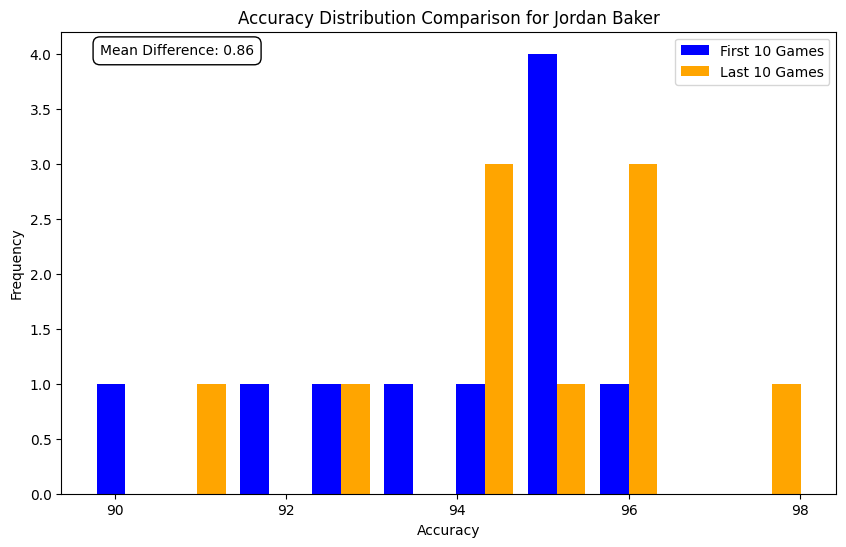

In [ ]:
#plotting the group of first 10 games and last 10 games
compare_first_to_last_games(example_group)

Looking at the distribution of we learned that Jordan Baker has an increase in accuracy compared to the beggining of the season to the end. There is a mean difference of .86 accuracy score by the end of the season which we believe shows an example of an increase of accuracy for Jordan Baker from the beggining of the year compared to the end of the year. In his opening 5 games he had a call accuracy of around 95% while in his last game he has an almost perfect game calling a game at 98% accuracy. For our next problem we decided to look into the favor_home value and see how it can show the impact of umpires.

### 3.3.1 What does the distribution of favor_home look like for all the umpires in the dataset?

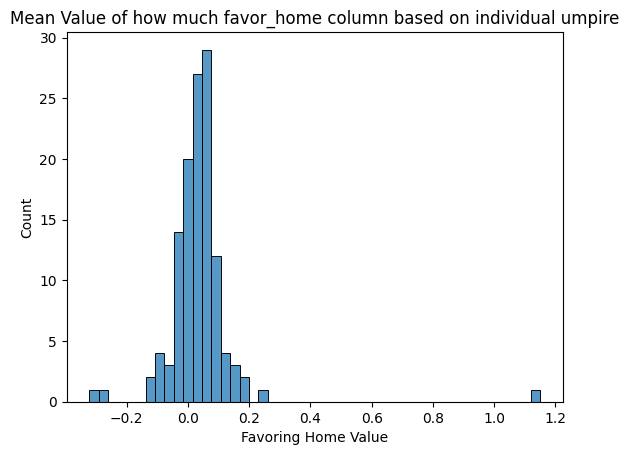

In [ ]:
#plot to look at distribution of mean values of home and away between all umpires
sns.histplot(grouped_by_umpire, x = "mean_favor_home")
plt.title("Mean Value of how much favor_home column based on individual umpire")
plt.xlabel("Favoring Home Value");

For this visualization we wanted to see how much of an advantage the hometeam usually gets from an umpire. There seems to be somewhat of a natural bias towards the home team but we believe this is because of other variables such as home crowd, homefield advantage, etc. It is clear to us that there one outlier so for our next study we want to see who that outlier could be.

### 3.3.2 Who is the outlier?

In [ ]:
#code to find the outlier
outlier_home = grouped_by_umpire[grouped_by_umpire["mean_favor_home"] > 1.0]
outlier_home

,umpire,mean_home_team_runs,mean_away_team_runs,mean_pitches_called,mean_incorrect_calls,mean_expected_incorect_calls,mean_correct_calls,mean_expected_correct_calls,correct_calls_above_expected,mean_accuracy,mean_expected_accuracy,mean_accuracy_above_expected,mean_consistency,mean_favor_home,mean_total_run_impact
9,Anthony Johnson,2.0,4.0,161.0,13.0,13.1,148.0,147.9,0.1,91.9,91.9,0.1,93.8,1.15,1.55


This code shows us that the outlier is Anthony Johnson, but it just shows us the mean of all of his stats so we want to take a look at all of Anthony Johnson's games.

In [ ]:
johnson_games = umpire[umpire["umpire"] == "Anthony Johnson"]
johnson_games

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact,Year
15894,15895,2015-09-27,Anthony Johnson,SD,ARI,2,4,161.0,13.0,13.1,148.0,147.9,0.1,91.9,91.9,0.1,93.8,1.15,1.55,2015


Looking at the following code cell, we learned why Anthony Johnson is an ourlier in the plot for favor_home. Since he only has 1 game recorded, it is clear that his favor_home value is so large. It is large since there aren't other games to even out the mean of the value. Since we found this out we wanted to move on to our next test which will involve us splitting the umpires into two groups based on their favor_home value.

### 3.3.3 Is there a difference in mean accuracies with umpires who favor home and umpires who favor away teams?

We would like to run a permutation test to if there is any noticable difference between umpires whose favor_home value is greater than 0 and umpires whose favor_home value is less that 0. To run the hypothesis test we must include a null hypothesis and an alternative hypothesis. We chose to split these groups at the value of 0 to see if there is any bias between home favoring umpires and away favoring umpires.

Null Hypothesis : There is no diffence in mean accuracies between umpires whose favor home and umpires who favor away teams

Alternative Hypothesis : There is a diffence in mean accuracies between umpires whose favor home and umpires who favor away teams

First we have to create new dataframes consisting of the two groups of umpires

In [ ]:
#splitting into groups based on favor_home
favor_home = grouped_by_umpire[grouped_by_umpire['mean_favor_home'] > 0.00]

#splitting into groups based on favor_home
favor_away = grouped_by_umpire[grouped_by_umpire['mean_favor_home'] < 0.00]

Next we would like to generate a test statistic to see the true difference in mean accuracy between the two groups

In [ ]:
#test stastic
test_statistic_accuracy = favor_home["mean_accuracy"].mean() - favor_away["mean_accuracy"].mean()
test_statistic_accuracy

-0.04041107907393382

We have learned that the true mean accuracy is -.04 so next we would like to generate 10,000 iterations of a random shuffle to and plot the results to see the empirical distribution compared to the test statistic.

In [ ]:
#generating empirical distribution, under the assumption that the null hypothesis is true
num_iterations = 10000
results_many_favoring_shuffles = np.array([])

for i in range(num_iterations):
  grouped_by_umpire["mean_favor_home_shuffled"] = np.random.permutation(grouped_by_umpire["mean_favor_home"])

  favor_home_after_shuffle = grouped_by_umpire[grouped_by_umpire['mean_favor_home_shuffled'] > 0.00]
  favor_away_after_shuffle = grouped_by_umpire[grouped_by_umpire['mean_favor_home_shuffled'] < 0.00]

  simulated_test_statistic = favor_home_after_shuffle["mean_accuracy"].mean() - favor_away_after_shuffle["mean_accuracy"].mean()

  results_many_favoring_shuffles = np.append(results_many_favoring_shuffles, simulated_test_statistic)

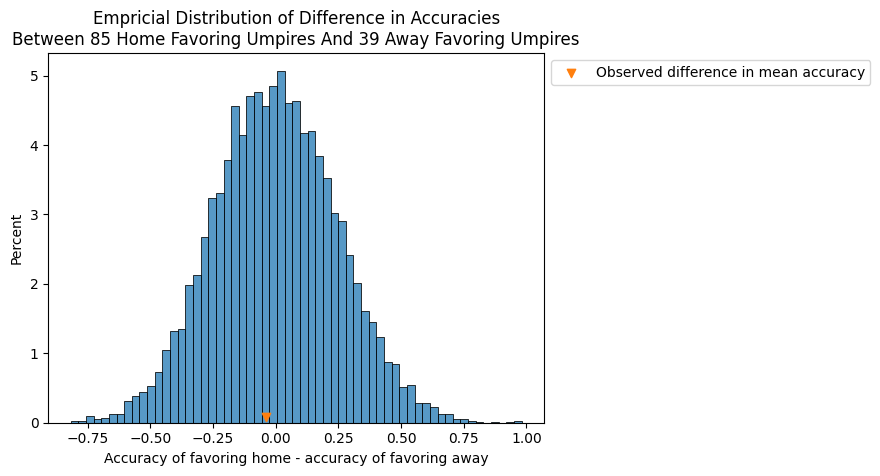

In [ ]:
#histplot to show results of the permutation test
sns.histplot(results_many_favoring_shuffles, stat = "percent")
plt.scatter(test_statistic_accuracy, .08, marker = "v", label = "Observed difference in mean accuracy")
plt.title("Empricial Distribution of Difference in Accuracies\nBetween 85 Home Favoring Umpires And 39 Away Favoring Umpires")
plt.xlabel("Accuracy of favoring home - accuracy of favoring away")
plt.legend(bbox_to_anchor=(1, 1.0));

In [ ]:
#calculating p-value

p_value = np.count_nonzero((results_many_favoring_shuffles >= abs(test_statistic_accuracy))  | (results_many_favoring_shuffles <= test_statistic_accuracy)) /num_iterations
p_value

0.8706

With a p-value of 87%, this strongly indicates that there is no significance evidence against the null hypothesis. We are accepting the null hypothesis, there is evidence that supports that there isn't a difference in accuracies of umpires who tend to favor home teams and umpires who tend to favor away teams. There is no associated between home favoring umpires and away favoring umpires so this makes us want to take a look at splitting the umpires into groups a different way. We want to split them into groups based on a threshold of absolute value of favor_home > .1 and <.1. We chose this value because it is where some noticable outliers appear in the graph that we previously worked with in section 3.3.1.

### 3.3.4 Is there a difference in mean accuracies with umpires based on a threshold of umpires whose absolute value of favor_home is greater than .1?

Now that we learned that there is not a strong difference in mean accuracy between favoring home and favoring away, we would like to work with a new threshold of absolute value of favor_home > .1 and <.1. As previously stated, we are choosing this value because in section 3.3.1 the graph starts to show a drop off in the bellcurve around this mark so we would like to do a permutation test with these new groups to notice if there is anything different with their mean accuracy values. First we must declare our null and alternative hypothesis.

Null Hypothesis : There is no diffence in mean accuracies between umpires whos mean favor_home value is > the absolute value of .1?

Alternative Hypothesis : There is a diffence in mean accuracies between umpires whos mean favor_home value is > the absolute value of .1?

In [ ]:
#splitting into groups based on favor_home
exterior_favor_home_value = grouped_by_umpire[abs(grouped_by_umpire['mean_favor_home']) > 0.1]
interior_favor_home_value = grouped_by_umpire[abs(grouped_by_umpire['mean_favor_home']) < 0.1]


In [ ]:
#calculating test statistic
test_statistic_accuracy_trial2 = interior_favor_home_value["mean_accuracy"].mean() - exterior_favor_home_value["mean_accuracy"].mean()
test_statistic_accuracy_trial2

0.30907026180439345

Now we have noticed that this test statistic is completly different from the previous test statistic, so we would like to continue with the permutation test to see the results of the distrubution compared to this new test statistic. We are going to run 10,000 trials of permutation tests to generate a histogram to see if there is anything to note.

In [ ]:
#generating empirical distribution, under the assumption that the null hypothesis is true
num_iterations = 10000
results_many_ext_int_shuffles = np.array([])

for i in range(num_iterations):
  grouped_by_umpire["mean_favor_home_shuffled"] = np.random.permutation(grouped_by_umpire["mean_favor_home"])

  exterior_favor_home_value_shuffle = grouped_by_umpire[abs(grouped_by_umpire['mean_favor_home_shuffled']) > 0.1]
  interior_favor_home_value_shuffle = grouped_by_umpire[abs(grouped_by_umpire['mean_favor_home_shuffled']) < 0.1]

  simulated_test_statistic = interior_favor_home_value_shuffle["mean_accuracy"].mean() - exterior_favor_home_value_shuffle["mean_accuracy"].mean()

  results_many_ext_int_shuffles = np.append(results_many_ext_int_shuffles, simulated_test_statistic)


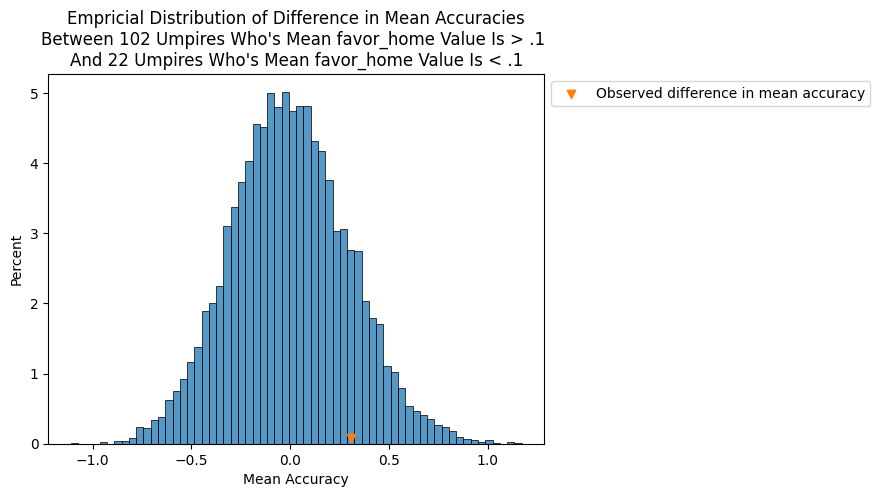

In [ ]:
#plot
sns.histplot(results_many_ext_int_shuffles, stat = "percent")
plt.scatter(test_statistic_accuracy_trial2, .08, marker = "v", label = "Observed difference in mean accuracy")
plt.title("Empricial Distribution of Difference in Mean Accuracies\nBetween 102 Umpires Who's Mean favor_home Value Is > .1 \nAnd 22 Umpires Who's Mean favor_home Value Is < .1")
plt.xlabel("Mean Accuracy")
plt.legend(bbox_to_anchor=(1, 1.0));

In [ ]:
#calculating p-value

p_value = np.count_nonzero((results_many_ext_int_shuffles >= test_statistic_accuracy_trial2)  | ( results_many_ext_int_shuffles <= -1 *(test_statistic_accuracy_trial2))) /num_iterations
p_value

0.2988

Looking at the results of the histogram and it's p-value that goes with it of 30% suggests that there isn't strong enough evidence against the null hypothesis. A p-value of 30% indicates that the observed results are reasonably likely to have occurred due to random chance. What we learned from this plot is that there isn't a strong indication of differences in accuracies but that there is a small suspicsion in the same group so we would like to work with the same group for our next test. Our next test will cover the difference in mean of incorrect calls with the same groups.

### 3.3.5 Is There A Difference In Average Incorrect Calls Per Game Using The Same Threshold?

Since our last trial showed that there could be reason to suspect something about the umpires who's mean favor_home value is > .1 and umpires who's mean favor_home value is < .1 we would like to use these groups again for the next experiment comparing the mean of incorrect calls per game with a bootstrap sample while estimating the parameter. We will be doing this by doing a bootstrap test with 10,000 iterations of bootstraps to compace the mean value of incorrect calls. We would also like to add a confidence interval to fully understand the distribution of the results.

In [ ]:
#bootstrap trails
num_bootstraps = 10000
results_ic = np.array([])

while len(results_ic) < num_bootstraps:
  bootstrap_sample = grouped_by_umpire.sample(124,replace = True)

  bootstrap_exterior_favor_home_value = bootstrap_sample[abs(bootstrap_sample['mean_favor_home']) > 0.1]
  bootstrap_interior_favor_home_value = bootstrap_sample[abs(bootstrap_sample['mean_favor_home']) < 0.1]

  bootstrap_ic = bootstrap_exterior_favor_home_value["mean_incorrect_calls"].mean() - bootstrap_interior_favor_home_value["mean_incorrect_calls"].mean()

  results_ic = np.append(results_ic, bootstrap_ic)

In [ ]:
#declaring left and right points for the confidence interval
left_ic = np.percentile(results_ic, 2.5, method = "higher")
right_ic = np.percentile(results_ic, 97.5, method = "higher")


In [ ]:
#calculating actual difference

ic_diff = exterior_favor_home_value["mean_incorrect_calls"].mean() - interior_favor_home_value["mean_incorrect_calls"].mean()
ic_diff

0.5640771573476293

Now that we know the actual difference of the values we would like to compare this value with the 10,000 bootstrap samples through a histogram.

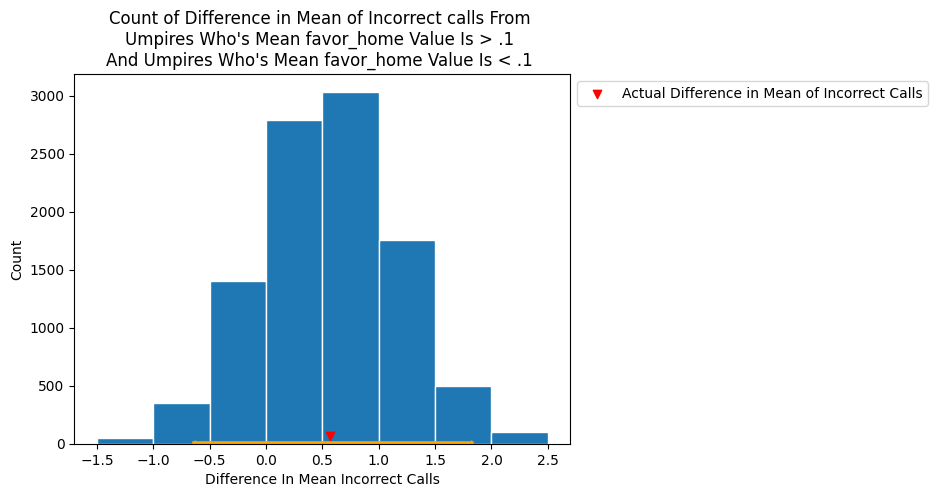

In [ ]:
#plotting results into histogram
plt.hist(results_ic, ec = "white", bins = np.arange(-1.5, 3, 0.5))
plt.ylabel("Count")
plt.xlabel("Difference In Mean Incorrect Calls")
plt.title("Count of Difference in Mean of Incorrect calls From \nUmpires Who's Mean favor_home Value Is > .1 \nAnd Umpires Who's Mean favor_home Value Is < .1 ")

plt.plot([left_ic, right_ic], [1,1],
         color = "orange",
         linewidth = 4,
         zorder = 2,
         marker = "|")

plt.scatter(ic_diff, 70, marker = "v", color = "red", label = "Actual Difference in Mean of Incorrect Calls")
plt.legend(bbox_to_anchor=(1, 1.0));

Looking at the confidence interval we are 95 percent confident that an umpire who's favor_home value is > .1 will have a mean incorrect call count that is
-.6 to 1.8 more than an umpire who's favor_home value is < .1. Even though it's a small value we can see that it is consistent for umpires who are outside the threshold of .1 have a greater amount of incorrect calls per game compared to umpires who lie within the threshold of .1. This doesn't fully prove that these umpires are bad at their job but once again it should cause suspicsion within the MLB to keep on eye on how these umpires officiate games. What we have learned from this test is that there isn't fully an association between umpires based on their favor_home value.

---

## 4. Conclusion

To summarize our research, we first started with examining scatterplots to compare the relationship between expected incorrect calls and actual incorrect calls and we found they had a someone strong correlation coeffient which helped us learn that the predictions of expected incorrect are pretty accurate. Next we formed a linear regression line to be able to predict accuracy based on how many incorrect calls an umpire may make in a game. This allowed us to the thougtht of grouping the umpires into groups to compare all of their mean accuracy and see if anything stands out, which we learned that 95% of umpires have a mean accuracy between 90-94.5% which tells us that MLB umpires are pretty consistent when calling games. This lead us to ask ourselves what would an umpires first 10 games looks like compared to their last 10 games in average accuracy. After doing this experiment with one of the umpires in the dataset we found that they had a better accuracy towards the end of the season which we learned that umpires have a chance of starting the season slow with a lower average accuracy percentage compared to the end of the season. Next we took a look at the distrubution of umpires favor_home values to see if anything stood out. We of course found an outlier and found out it was Anthony Johnson who only have 1 single game that he officiated so we concluded that he was an outlier because he only had one single game on his belt. Next we split that umpires into two groups based on their favor_home value and did a permutation test to see if there is any difference in accuracy based on these values. Our first permutation test highly suggested that there really isn't a difference in umpire's mean accuracy when their favor_home value supports the home team or the away team. This lead us into splitting the umpires into two different groups again based on a threshold of absolute value of favor_home > .1 and <.1. When doing a permutation test of these two groups we found that there was a somewhat strong p-value that suggested that the null hypothesis is most likely true. Since it wasn't as strong as a p-value as the first permuation test we wanted to use these same groups to look at the difference in average incorrect calls per game between these two groups. We found that it is common for an umpire to make more incorrect calls per game who lied in the group that was >.1 but it wasn't a significant amount of a difference to show that there is something wrong. To conclude, most of the umpires in the dataset are capable of calling the game accurately but some groups should be watched with suspicsion. If we had more time with this project some topics we would have researched viewed individual teams to see if certain umpires held a bias towards certain teams based on their call accuracy for that team compared to others. Another test we could have viewed would have been to see if certain umpires officiate games in a certain location more than others. The next test we would have ran if we had more time would be to see if the MLB schedules better umpires for more games.